# Redes Neuronales en JULIA

In [1]:
# LIBRERIA ---

In [2]:
images = Flux.Data.FashionMNIST.images();
labels = Flux.Data.FashionMNIST.labels();

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /root/.julia/packages/Flux/qAdFM/src/data/Data.jl:16
┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /root/.julia/packages/Flux/qAdFM/src/data/Data.jl:16


In [3]:
#Set de imágenes de Entrenamiento
length(labels)

60000

# Análisis de Imágenes

### Imágenes del DataSet de Entrenamiento

,,,,

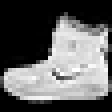
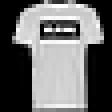
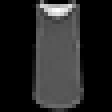
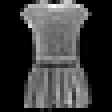
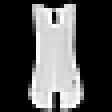

In [4]:
images[1:5]  # Se presentan las imágenes

### Etiquetas

In [5]:
# Etiquetas 
labels[1:5]

5-element Vector{Int64}:
 9
 0
 0
 3
 0

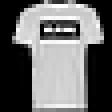

In [6]:
images[2]

In [7]:
typeof(images)


Vector{Matrix{Gray{N0f8}}} (alias for Array{Array{Gray{Normed{UInt8, 8}}, 2}, 1})

In [8]:
Float64.(images[2])

28×28 Matrix{Float64}:
 0.0  0.0  0.0  0.0         0.0       …  0.0       0.0       0.0  0.0
 0.0  0.0  0.0  0.00392157  0.0          0.0       0.0       0.0  0.0
 0.0  0.0  0.0  0.0         0.0          0.0       0.0       0.0  0.0
 0.0  0.0  0.0  0.0         0.0          0.160784  0.0       0.0  0.0
 0.0  0.0  0.0  0.0         0.2          0.54902   0.0       0.0  0.0
 0.0  0.0  0.0  0.0         0.454902  …  0.878431  0.0       0.0  0.0
 0.0  0.0  0.0  0.0         0.784314     0.980392  0.14902   0.0  0.0
 0.0  0.0  0.0  0.0         0.968627     0.862745  0.372549  0.0  0.0
 0.0  0.0  0.0  0.176471    0.886275     0.831373  0.611765  0.0  0.0
 0.0  0.0  0.0  0.643137    0.921569     0.858824  0.815686  0.0  0.0
 0.0  0.0  0.0  0.415686    0.733333  …  0.756863  0.443137  0.0  0.0
 0.0  0.0  0.0  0.0         0.0          0.0       0.0       0.0  0.0
 0.0  0.0  0.0  0.0         0.0          0.0       0.0       0.0  0.0
 ⋮                                    ⋱            ⋮              


In [9]:
size(images[2])  # Intput de la red neuronal 

(28, 28)

# Redes Neuronales con JULIA

In [10]:
n_entradas = unique(length.(images))[]  #Ingreso de la red neuronal

784

In [11]:
n_salidas = length(unique(labels))  #salida del clasificador tipo vanilla (una sola capa oculta )

10

In [12]:
preprocess(img) = vec(Float64.(img)) # Ingreso del a Imagen como float64

preprocess (generic function with 1 method)

In [13]:
xs = preprocess.(images[1:5000]); # Procesamiento del set de Entrenamiento 

In [14]:
ys = [Flux.onehot(label, 0:9) for label in labels[1:5000]]; # Etiquetado del set de entrenamiento 

In [15]:
function creacion_batch(r)
    xs = [preprocess(img) for img in images[r]]    # Imágenes procesadas
    ys = [Flux.onehot(label, 0:9) for label in labels[r]]
    return (Flux.batch(xs), Flux.batch(ys))
end

creacion_batch (generic function with 1 method)

In [16]:
trainbatch = creacion_batch(1:5000); # Se crea el batch de entrenamiento de la red neuronal

In [18]:
model = Chain(Dense(n_entradas, n_salidas, identity), softmax ) # Se crea el modelo de la red neuronal
L(x,y) = Flux.crossentropy(model(x),y)
opt = SGD(params(model))
@time Flux.train!(L, [trainbatch], opt)
@time Flux.trian!(L, [trainbatch], opt) 

L (generic function with 1 method)